 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
path = "D:\COURSES\Ai course\kc_house_data.csv"
kc_house = pd.read_csv(path)
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# data preprocessing 

In [3]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
kc_house.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [5]:
kc_house.shape

(21613, 21)

In [6]:
kc_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# data cleaning  

In [7]:
kc_house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# No missing values to clean.

In [9]:
kc_house.drop(["id","date","yr_built","yr_renovated","zipcode","view","waterfront","condition","sqft_lot15"],axis=1,inplace=True)
kc_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,lat,long,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,7,1180,0,47.5112,-122.257,1340
1,538000.0,3,2.25,2570,7242,2.0,7,2170,400,47.7210,-122.319,1690
2,180000.0,2,1.00,770,10000,1.0,6,770,0,47.7379,-122.233,2720
3,604000.0,4,3.00,1960,5000,1.0,7,1050,910,47.5208,-122.393,1360
4,510000.0,3,2.00,1680,8080,1.0,8,1680,0,47.6168,-122.045,1800


In [10]:
kc_house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15'],
      dtype='object')

# data visualization 

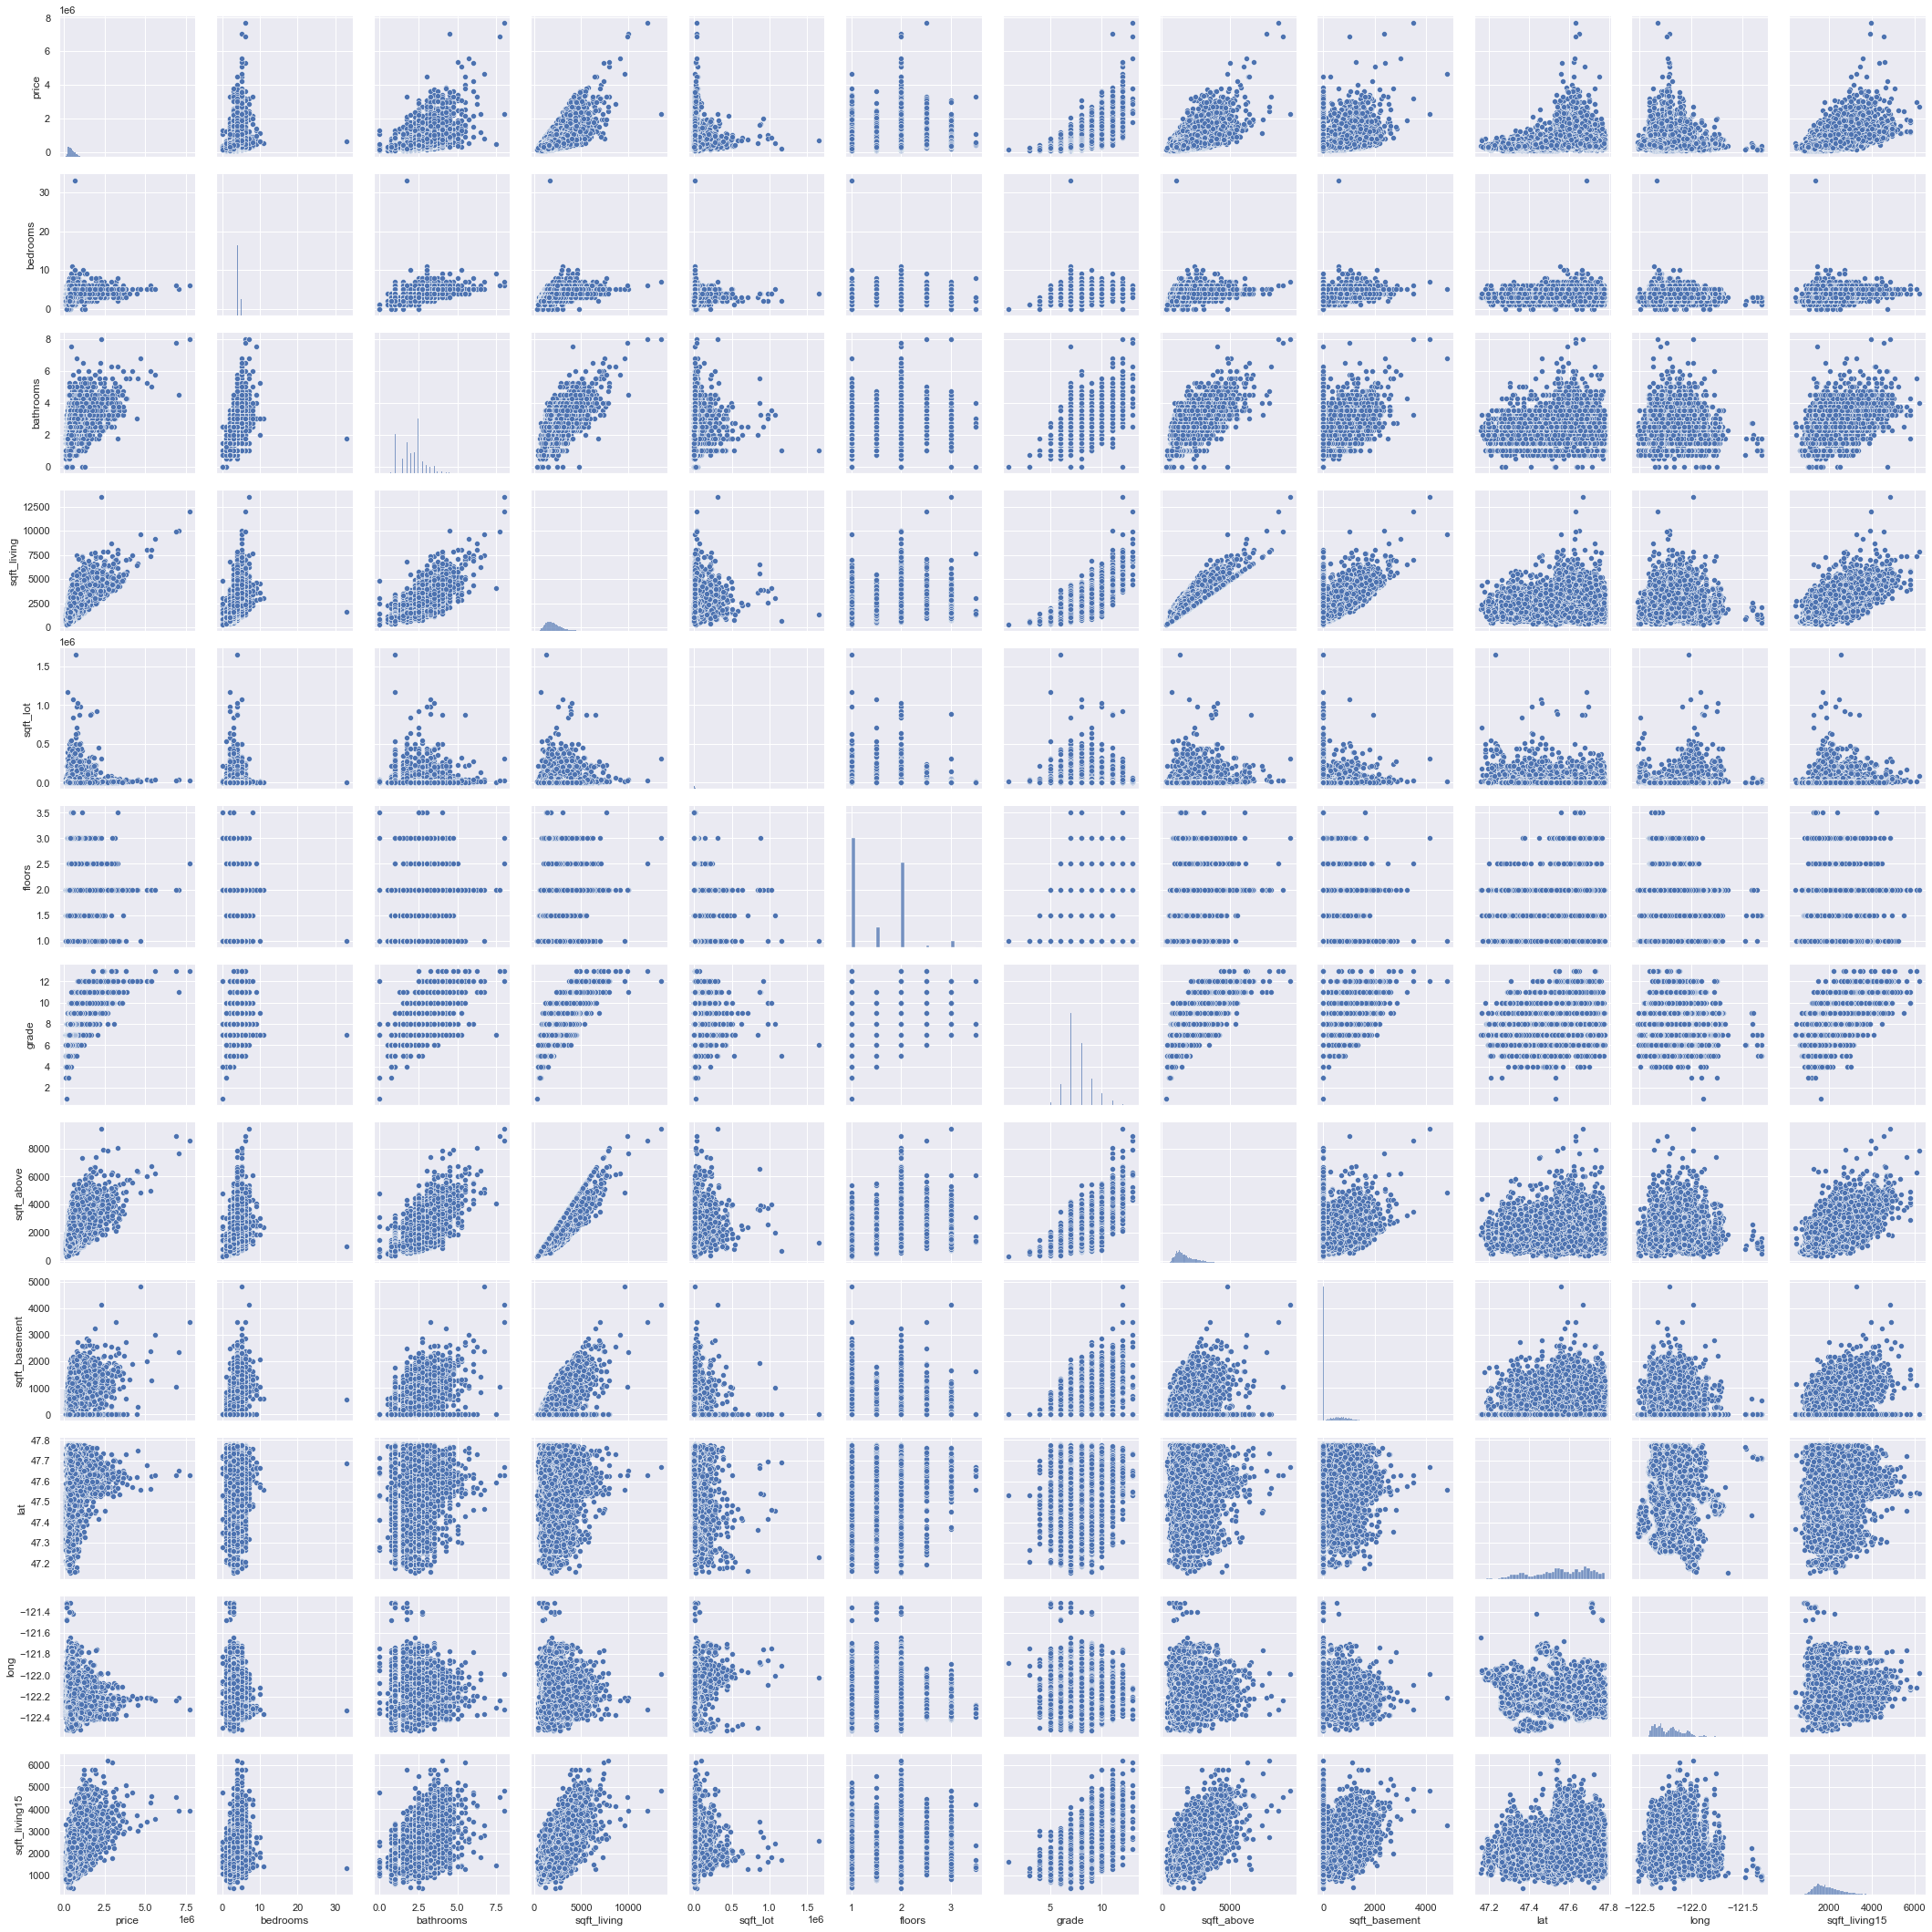

In [11]:
sns.set(style="darkgrid")
sns.pairplot(kc_house)

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

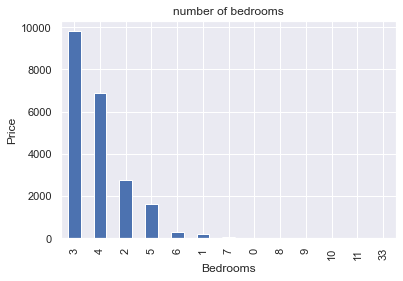

In [12]:
kc_house["bedrooms"].value_counts().plot(kind="bar")
plt.title("number of bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
sns.despine

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

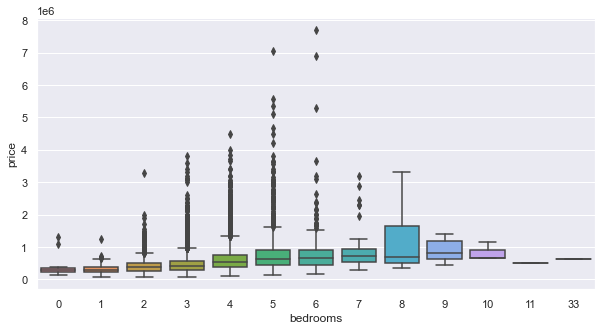

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bedrooms',y = 'price',data =kc_house )

C:\Users\nagham\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

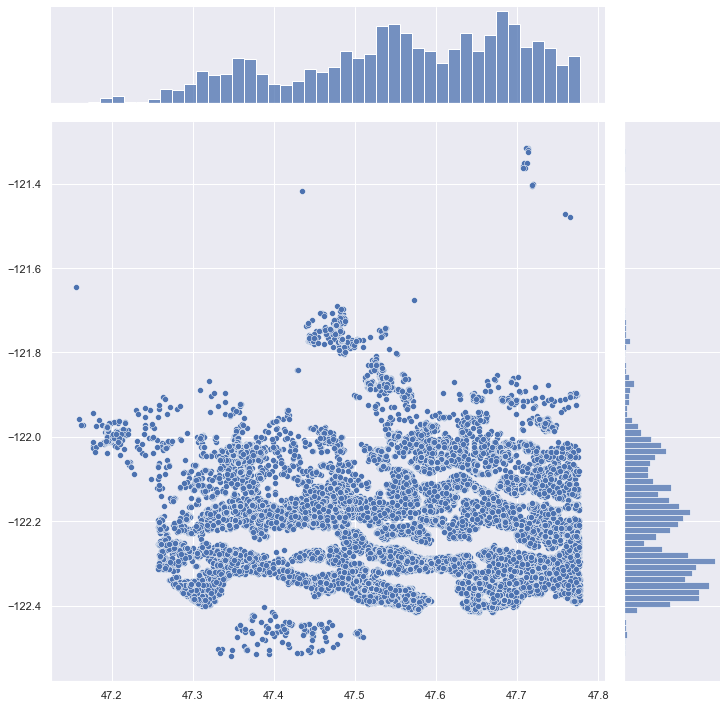

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [14]:
plt.figure(figsize=(20,20))
sns.jointplot(x=kc_house.lat.values, y=kc_house.long.values, size=10)
plt.ylabel('Longitude', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

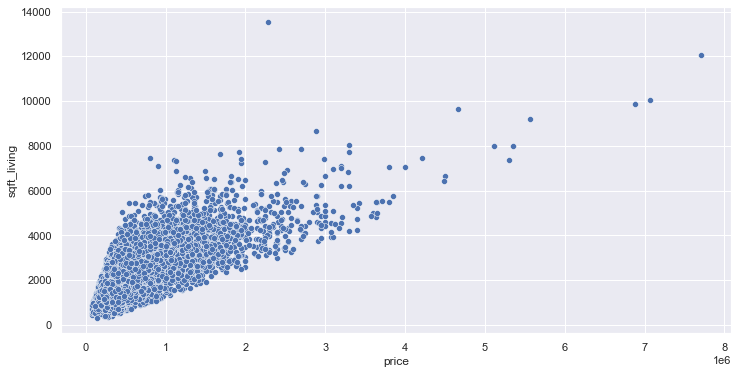

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price',y= 'sqft_living',data = kc_house)

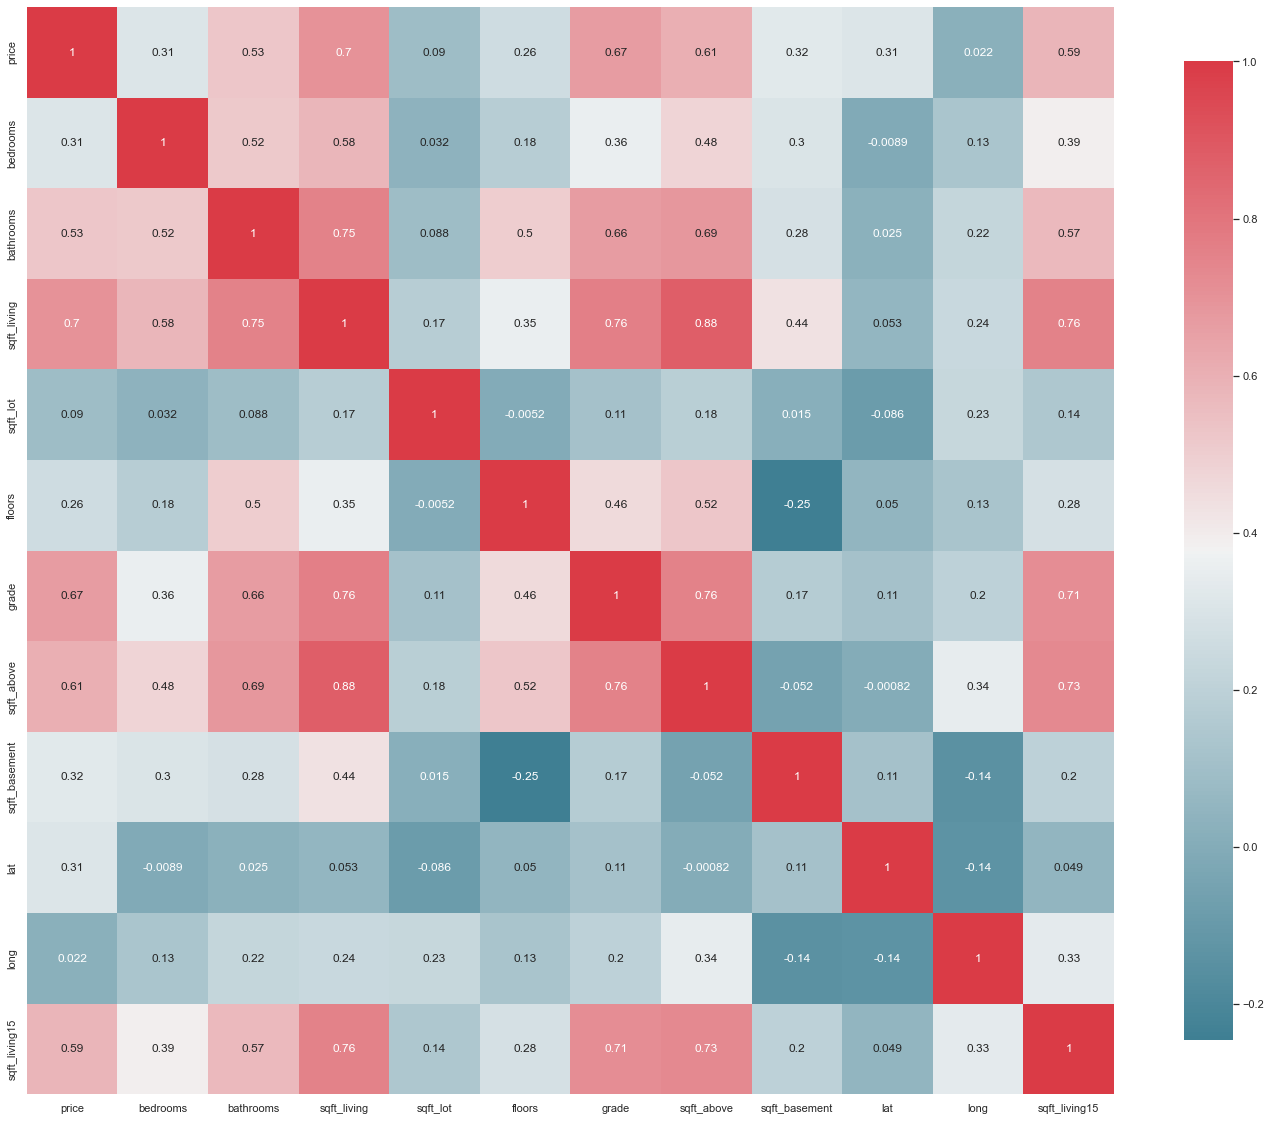

In [16]:
def plot_correlation_map( kc_house ):
    corr = kc_house.corr()
    s , ax = plt.subplots( figsize =( 25 , 20 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ "shrink" : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { "fontsize" : 12}
        ) 
plot_correlation_map(kc_house)    

# Linear Regression and Multiple-Linear Regression

In [17]:
#extract x and y from our data
x=kc_house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'lat', 'long', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15']]
y=kc_house["price"].values

train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [19]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,lat,long,floors,grade,sqft_above,sqft_basement,sqft_living15
1468,4,1.50,1390,7200,47.7224,-122.332,1.0,7,1140,250,1630
15590,3,1.50,1450,7316,47.7725,-122.349,1.0,7,1450,0,1440
18552,5,2.75,2860,5379,47.7082,-122.104,2.0,9,2860,0,2980
10535,2,1.00,1050,4125,47.5736,-122.307,1.0,7,1050,0,1650
1069,2,1.00,1240,57000,47.5970,-122.059,1.0,7,1240,0,3050
...,...,...,...,...,...,...,...,...,...,...,...
13123,5,5.00,3960,94089,47.3800,-122.011,2.0,10,3960,0,2240
19648,2,2.50,1400,1262,47.5342,-122.349,2.0,8,1160,240,1060
9845,3,2.25,2360,14950,47.3856,-122.158,1.0,9,2360,0,2720
10799,4,2.00,2370,76665,47.2831,-122.279,2.0,8,2370,0,2110


In [20]:
y_train

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [21]:
#build linear regression model
model=LinearRegression() 
model.fit(x_train,y_train) #fitting the training data

LinearRegression()

In [22]:
predicted=model.predict(x_test) #testing our model’s performance

In [23]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 52672390735.101265
R squared 0.6163475709452587


In [24]:
model.coef_

array([-3.48629621e+04, -1.74725745e+03,  1.41713807e+02,  1.63213709e-01,
        6.10814643e+05, -3.61327996e+05, -2.82268670e+04,  7.91426311e+04,
        6.57675435e+01,  7.59462637e+01,  4.80044649e+01])

In [25]:
coeff_df=pd.DataFrame(model.coef_,x.columns,columns=["coefficient"])
coeff_df

,coefficient
bedrooms,-34862.962064
bathrooms,-1747.257454
sqft_living,141.713807
sqft_lot,0.163214
lat,610814.642572
long,-361327.995519
floors,-28226.867040
grade,79142.631098
sqft_above,65.767544
sqft_basement,75.946264


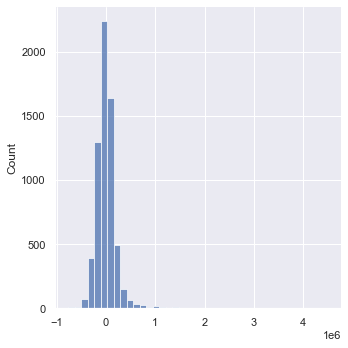

In [26]:
sns.displot((y_test-predicted),bins=40);

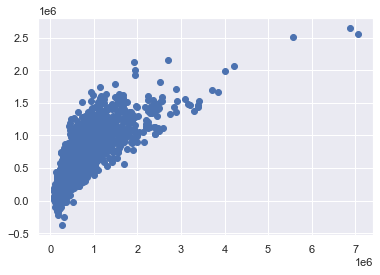

In [27]:
plt.scatter(y_test,predicted)

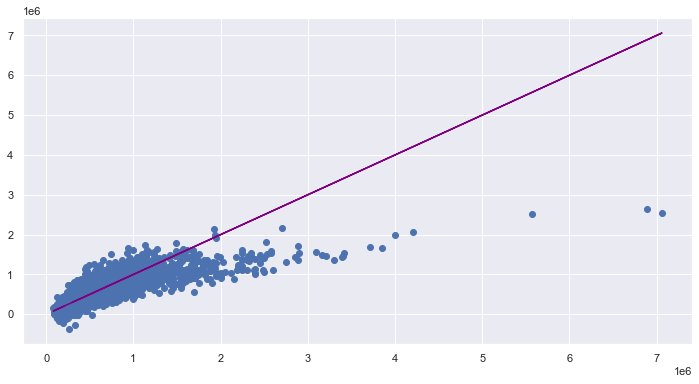

In [28]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predicted)
plt.plot(y_test,y_test,'purple')

In [29]:
space=kc_house['sqft_living']
price=kc_house['price']

In [30]:
x = np.array(space).reshape(-1, 1)
y = np.array(price)

In [31]:
#Splitting the data into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)
#Fitting simple linear regression to the Training Set
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

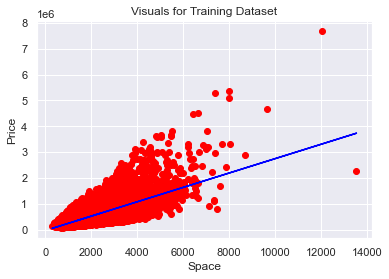

In [32]:
#Visualizing the training Test Results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()


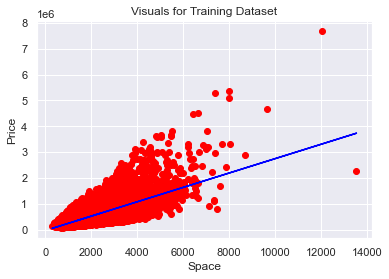

In [33]:
#Visualizing the training Test Results 
plt.scatter(x_train, y_train, color= 'red')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

# Applying polynomial Regression

In [34]:
poly=PolynomialFeatures(degree=3)

lg=LinearRegression()
x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
pred = lg.predict(x_test_)

In [35]:
x_=poly.fit_transform(x)
print("x before transformation: ", x)
print("x after transformation: ", x_)
lg.fit(x_, y) # Fitting Polynomial Regression to the dataset 

x before transformation:  [[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]
x after transformation:  [[1.0000000e+00 1.1800000e+03 1.3924000e+06 1.6430320e+09]
 [1.0000000e+00 2.5700000e+03 6.6049000e+06 1.6974593e+10]
 [1.0000000e+00 7.7000000e+02 5.9290000e+05 4.5653300e+08]
 ...
 [1.0000000e+00 1.0200000e+03 1.0404000e+06 1.0612080e+09]
 [1.0000000e+00 1.6000000e+03 2.5600000e+06 4.0960000e+09]
 [1.0000000e+00 1.0200000e+03 1.0404000e+06 1.0612080e+09]]


LinearRegression()

In [36]:
print("MSE: ", metrics.mean_squared_error(y_test, pred))
print("R squared: ", metrics.r2_score(y_test,pred))

MSE:  63150718492.58818
R squared:  0.5400260704307094


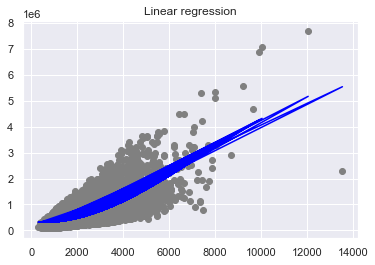

In [37]:
plt.scatter(x, y, color="gray")
plt.title("Linear regression")
plt.ylabel("")
plt.xlabel("")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="blue") 